### **<p style="text-align: center;">Comparación modelo logístico clásico con modelos de redes neuronales en modelos de originación en el sistema financiero</p>**
##### Autor:Diego Andrés Martínez Parada

**Introducción:**

En el ámbito del aprendizaje automático y la estadística, la selección del modelo adecuado es crucial para la precisión y la eficacia de las predicciones. Entre los modelos más utilizados en la clasificación binaria, se encuentran el modelo logístico clásico, el modelo logístico optimizado mediante descenso del gradiente, y las redes neuronales. Cada uno de estos enfoques tiene sus propias ventajas y limitaciones, y la elección del modelo puede depender de factores como la complejidad del problema, la cantidad de datos disponibles y los recursos computacionales.

El modelo logístico clásico, basado en la regresión logística, es ampliamente conocido por su simplicidad y su capacidad para ofrecer interpretaciones claras. Este modelo utiliza una función sigmoidea para modelar la probabilidad de una clase binaria y se ajusta utilizando técnicas de máxima verosimilitud. Su eficiencia y facilidad de implementación lo convierten en una herramienta fundamental en la práctica estadística y en la ciencia de datos.

Por otro lado, el modelo logístico mediante descenso del gradiente representa una evolución significativa del enfoque clásico. Aunque la regresión logística sigue siendo el núcleo del modelo, el descenso del gradiente es un método de optimización utilizado para ajustar los parámetros del modelo. Este enfoque permite una optimización más eficiente y puede manejar problemas de alta dimensionalidad y grandes conjuntos de datos, ofreciendo flexibilidad adicional en términos de ajuste y regularización.

En contraste, las redes neuronales han emergido como una poderosa herramienta para la clasificación y la predicción en problemas complejos. A través de múltiples capas de neuronas, las redes neuronales pueden modelar relaciones no lineales y capturar patrones complejos en los datos. Las técnicas de aprendizaje profundo, una extensión de las redes neuronales, han demostrado ser particularmente efectivas en la extracción de características y en la mejora del rendimiento predictivo.

El objetivo de este trabajo es comparar estos tres enfoques en términos de su capacidad predictiva por medio de las métricas de desempeño y los backtesting utilizados ampliamente en el sector financiero en un conjunto de datos que provee el Banco para realizar originación en un producto de microcrédito, el **evento** se toma como aquellos créditos que tuvieron una mora de más de 30 días en los 12 meses siguientes a partir de la fecha de la primera cuota. La comparación se centrará en cómo cada modelo maneja el ajuste de parámetros, la interpretación de resultados, y la capacidad para generalizar a datos no vistos. 

In [428]:
## Caragar librerias necesiarias para el modelamiento
from matplotlib import pyplot as plt
import os
import pickle
import random
import seaborn as sns
import pandas as pd                                 #Procesamiento de datos.
import numpy as np                                  #Álgebra lineal.
import math                                         #Para calcular función piso y techo.
import seaborn as sns
seed=42
random.seed(seed)
np.random.seed(seed)
import copy
import h5py #
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

from sklearn import model_selection 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [429]:
# Cargar los datos
datos = pd.read_excel('BASE_CALIFICADA_VAR_COMPLETA.xlsx', sheet_name='Sheet1')
#list(datos.columns)

**Conjunto de datos y características**

El conjunto de datos cuenta con los siguientes identificadores y variables, las variables Dummy se generaron a partir de las variables cuantitativas y cortes hechos por binning e information value. El último valor llamado **Probabilidad** se refiere a los valores calculados por un modelo de regresión logística clásica, este se obtuvo por medio de validación cruzada (10 fold) y se comprobó que las variables que allí se usaron pasaran pruebas VIF para evitar multicolinealidad. Este último modelo puede ser encontrado en el archivo **codigo_modelo.ipynb** las gráficas descriptivas se pueden encontrar en *
**AUX_STEPWISE_VARIABLES.ipynb**. El modelo fue construido para un producto Bancario en Agosto de 2024.

|NOMBRE|TIPO|
|------|----|
|CREDITO|Llave|
|EVENTO|Mora 30-12|
|SCORE|Cuantitava dada por el BURO|
|EDAD|Cuantitativa|
|NUMERO_HIJOS|Cuantitativa|
|PERSONAS_A_CARGO|Cuantitativa|
|EXPERIENCIA_ACTIVIDAD|Cuantitativa (Meses)|
|ANTIGUEDAD_NEGOCIO|Cuantitativa (Meses)|
|TIEMPO_LOCAL|Cuantitativa (Meses)|
|TIEMPO_VIVIR_VIVIENDA|Cuantitativa (Meses)|
|VENTAS|Cuantitativa (SMLV)|
|COSTO_DE_VENTAS|Cuantitativa (SMLV)|
|UTILIDAD_BRUTA|Cuantitativa (SMLV)|
|REMUNERACION_PERSONAL|Cuantitativa (SMLV)|
|CUOTAS_FINANCIERAS|Cuantitativa (SMLV)|
|TOTAL_GASTOS|Cuantitativa (SMLV)|
|UTILIDAD_MICROEMPRESA|Cuantitativa (SMLV)|
|INGRESOS_FAMILIARES|Cuantitativa (SMLV)|
|EGRESOS_FAMILIARES|Cuantitativa (SMLV)|
|BANCOS|Cuantitativa (SMLV)|
|ACTIVOS_TOTAL|Cuantitativa (SMLV)|
|OBLIGACIONES_FINANCIERAS|Cuantitativa (SMLV)|
|TOTAL_PASIVOS|Cuantitativa (SMLV)|
|TOTAL_PATRIMONIO|Cuantitativa (SMLV)|
|TIPO_VINCULACION_1|Dummy|
|NUMERO_HIJOS_1_TIPO_VINCULACION_1|Dummy|
|EDAD_3_TIPO_VINCULACION_1|Dummy|
|TIPO_VIVIENDA_1_TIPO_VINCULACION_1|Dummy|
|ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1|Dummy|
|TIPO_VIVIENDA_1|Dummy|
|SCORE_3_TIPO_VINCULACION_1|Dummy|
|TIPO_VIVIENDA_1_EDAD_3|Dummy|
|SCORE_1_ACTIVOS_TOTAL_1|Dummy|
|SCORE_1|Dummy|
|VENTAS_2_TIPO_VINCULACION_1|Dummy|
|ACTIVOS_TOTAL_1|Dummy|
|RAZON_PASIVOS_ACTIVOS_2_TIPO_VINCULACION_1|Dummy|
|CIUDAD_1_ACTIVOS_TOTAL_1|Dummy|
|SCORE_1_TOTAL_PASIVOS_1|Dummy|
|ACTIVOS_TOTAL_2_TIPO_VINCULACION_1|Dummy|
|TOTAL_PASIVOS_1_ACTIVOS_TOTAL_1|Dummy|
|ESTADO_CIVIL_1_ACTIVOS_TOTAL_1|Dummy|
|SCORE_4|Dummy|
|VENTAS_2_ACTIVOS_TOTAL_1|Dummy|
|ANTIGUEDAD_NEGOCIO_1|Dummy|
|ACTIVOS_TOTAL_3|Dummy|
|ACTIVOS_TOTAL_1_TIPO_VIVIENDA_3|Dummy|
|ANTIGUEDAD_NEGOCIO_1_EDAD_3|Dummy|
|SCORE_4_EDAD_3|Dummy|
|TIPO_VIVIENDA_1_RAZON_PASIVOS_ACTIVOS_2|Dummy|
|NUMERO_HIJOS_1_EDAD_3|Dummy|
|SCORE_3|Dummy|
|SCORE_3_EDAD_3|Dummy|
|CIUDAD_1_TIPO_VINCULACION_1|Dummy|
|ESTADO_CIVIL_3_TIPO_VINCULACION_1|Dummy|
|SCORE_4_TIPO_VINCULACION_1|Dummy|
|TIPO_VIVIENDA_3|Dummy|
|EDAD_3|Dummy|
|SCORE_1_TIPO_VIVIENDA_3|Dummy|
|TOTAL_PASIVOS_2_TIPO_VINCULACION_1|Dummy|
|ACTIVOS_TOTAL_1_GENERO_1|Dummy|
|VENTAS_2_TIPO_VIVIENDA_3|Dummy|
|ACTIVOS_TOTAL_3_EDAD_3|Dummy|
|SCORE_1_GENERO_1|Dummy|
|ESTADO_CIVIL_1_TOTAL_PASIVOS_1|Dummy|
|TOTAL_PASIVOS_1_TIPO_VIVIENDA_3|Dummy|
|TOTAL_PASIVOS_1_TIPO_VINCULACION_1|Dummy|
|ESTADO_CIVIL_1_TIPO_VIVIENDA_3|Dummy|
|TIPO_VIVIENDA_1_ESTADO_CIVIL_3|Dummy|
|CIUDAD_1_TOTAL_PASIVOS_1|Dummy|
|CIIU_2_ACTIVOS_TOTAL_1|Dummy|
|ANTIGUEDAD_NEGOCIO_1_RAZON_PASIVOS_ACTIVOS_2|Dummy|
|ESTADO_CIVIL_1_TIPO_VINCULACION_1|Dummy|
|ACTIVOS_TOTAL_3_TIPO_VINCULACION_1|Dummy|
|ANTIGUEDAD_NEGOCIO_1_ESTADO_CIVIL_3|Dummy|
|ACTIVOS_TOTAL_3_RAZON_PASIVOS_ACTIVOS_2|Dummy|
|SCORE_4_RAZON_PASIVOS_ACTIVOS_2|Dummy|
|EDAD_2_ACTIVOS_TOTAL_1|Dummy|
|ESTADO_CIVIL_3|Dummy|
|RAZON_PASIVOS_ACTIVOS_2_EDAD_3|Dummy|
|EDAD_3_ESTADO_CIVIL_3|Dummy|
|NUMERO_HIJOS_1_ESTADO_CIVIL_3|Dummy|
|NUMERO_HIJOS_1|Dummy|
|CIUDAD_1_TIPO_VIVIENDA_3|Dummy|
|ACTIVOS_TOTAL_2_EDAD_3|Dummy|
|GENERO_1_TIPO_VINCULACION_1|Dummy|
|VENTAS_2_TOTAL_PASIVOS_1|Dummy|
|CIIU_2_TOTAL_PASIVOS_1|Dummy|
|TOTAL_PASIVOS_1|Dummy|
|CIIU_2_TIPO_VINCULACION_1|Dummy|
|EDAD_1_ACTIVOS_TOTAL_1|Dummy|
|TIPO_VIVIENDA_3_GENERO_1|Dummy|
|EDAD_1|Dummy|
|ESTADO_CIVIL_1_GENERO_1|Dummy|
|EDAD_2_TIPO_VIVIENDA_3|Dummy|
|SCORE_2_ACTIVOS_TOTAL_1|Dummy|
|SCORE_3_RAZON_PASIVOS_ACTIVOS_2|Dummy|
|ACTIVOS_TOTAL_3_GENERO_1|Dummy|
|TOTAL_PASIVOS_2_EDAD_3|Dummy|
|ESTADO_CIVIL_1|Dummy|
|CIIU_2_TIPO_VIVIENDA_3|Dummy|
|SCORE_3_ESTADO_CIVIL_3|Dummy|
|SCORE_2_TIPO_VIVIENDA_3|Dummy|
|CIUDAD_3_TIPO_VINCULACION_1|Dummy|
|TOTAL_PASIVOS_3_TIPO_VINCULACION_1|Dummy|
|CIUDAD_3_EDAD_3|Dummy|
|TOTAL_PASIVOS_1_GENERO_1|Dummy|
|EDAD_1_TOTAL_PASIVOS_1|Dummy|
|NUMERO_HIJOS_1_RAZON_PASIVOS_ACTIVOS_2|Dummy|
|SCORE_4_ESTADO_CIVIL_3|Dummy|
|ACTIVOS_TOTAL_1_TIPO_VINCULACION_1|Dummy|
|CIIU_6|Dummy|
|ACTIVOS_TOTAL_2_ESTADO_CIVIL_3|Dummy|
|TOTAL_PASIVOS_3|Dummy|
|RAZON_PASIVOS_ACTIVOS_2_ESTADO_CIVIL_3|Dummy|
|CIIU_6_EDAD_3|Dummy|
|ACTIVOS_TOTAL_2|Dummy|
|EDAD_2_TOTAL_PASIVOS_1|Dummy|
|TOTAL_PASIVOS_3_EDAD_3|Dummy|
|TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2|Dummy|
|VENTAS_2_ESTADO_CIVIL_3|Dummy|
|TIPO_VIVIENDA_1_GENERO_1|Dummy|
|EDAD_2_TIPO_VINCULACION_1|Dummy|
|SCORE_2_TOTAL_PASIVOS_1|Dummy|
|EDAD_2|Dummy|
|CIIU_2_GENERO_1|Dummy|
|SCORE_1_RAZON_PASIVOS_ACTIVOS_2|Dummy|
|SCORE_2|Dummy|
|SCORE_2_GENERO_1|Dummy|
|TOTAL_PASIVOS_3_RAZON_PASIVOS_ACTIVOS_2|Dummy|
|TOTAL_PASIVOS_2_ESTADO_CIVIL_3|Dummy|
|SCORE_4_TOTAL_PASIVOS_1|Dummy|
|ACTIVOS_TOTAL_3_ESTADO_CIVIL_3|Dummy|
|SCORE_4_GENERO_1|Dummy|
|CIIU_6_TIPO_VINCULACION_1|Dummy|
|VENTAS_2_GENERO_1|Dummy|
|CIUDAD_3_ESTADO_CIVIL_3|Dummy|
|FECHA_DESEMBOLSO|Dummy|
|**PROBABILIDAD**|*Probabilidad modelo clásico*|

**Descripción general y evento**

<img src="images/exclusiones_evento.PNG" style="width:900px;height:600px;">


#### **Descriptiva variables dummy usadas en modelo logístico clásico, definición y betas**

<img src="images/variables_selec_betas.PNG" style="width:900px;height:400px;">

<img src="images/descrip1.PNG" style="width:900px;height:500px;">

<img src="images/descrip2.PNG" style="width:900px;height:500px;">

<img src="images/descrip3.PNG" style="width:900px;height:500px;">

<img src="images/descrip4.PNG" style="width:900px;height:500px;">

<img src="images/descrip5.PNG" style="width:900px;height:500px;">

<img src="images/descrip6.PNG" style="width:900px;height:500px;">

<img src="images/descrip7.PNG" style="width:900px;height:500px;">

<img src="images/descrip8.PNG" style="width:900px;height:500px;">

In [441]:
df=datos[datos['FECHA_DESEMBOLSO'] < '2023-04-01'] ## El modelo originar se entreno hasta marzo de 2023
df.iloc[:, 2:24].describe().T

,count,mean,std,min,25%,50%,75%,max
SCORE,19005.0,675.932176,140.740458,0.000000,614.000000,684.000000,762.000000,999.000000
EDAD,19005.0,43.366626,13.852775,18.252055,32.254795,42.750685,54.027397,78.723288
NUMERO_HIJOS,19005.0,1.842147,1.524107,0.000000,1.000000,2.000000,3.000000,63.000000
PERSONAS_A_CARGO,19005.0,0.858037,1.008201,0.000000,0.000000,1.000000,1.000000,41.000000
EXPERIENCIA_ACTIVIDAD,19005.0,118.873612,97.250653,6.000000,48.000000,96.000000,144.000000,720.000000
ANTIGUEDAD_NEGOCIO,19005.0,112.255827,93.659085,1.000000,48.000000,84.000000,132.000000,969.000000
TIEMPO_LOCAL,19005.0,98.997264,86.776537,1.000000,36.000000,60.000000,120.000000,996.000000
TIEMPO_VIVIR_VIVIENDA,19005.0,0.091713,1.730640,0.000000,0.000000,0.000000,0.000000,96.000000
VENTAS,19005.0,12.304378,12.398696,0.242150,5.008112,8.207957,14.584063,140.887548
COSTO_DE_VENTAS,19005.0,7.963319,9.764124,0.000000,2.395088,4.800000,9.530516,124.534528


## Métodos: entrada, salida, arquitectura de la red y métrica de evaluación del modelo

Primeramente se incluirán todas las variables dummy y las variables cuantitativas dado que no es necesario en este tipo de modelos el cumplimiento de supuestos, posteriormente se tomara para comparar métricas las mismas variables que se tomaron en el modelo clásico (cumplimiento de supuestos). El primer modelo que entrenaremos es el modelo logístico. Luego iremos avanzando con modelos de deep learning con una capa, dos y más capas y diferentes hiperparámetros.

#### Logistic Regression with a Neural Network mindset

In [443]:
list_cuantis=list(datos.columns)[2:24]
#list_cuantis
list_cualis=['EVENTO']+list(datos.columns)[24:137]
#list_cualis
df1=df.drop(columns=["CREDITO","FECHA_DESEMBOLSO", "PROBABILIDAD"])

In [444]:
cualis=list_cualis
cuantis=list_cuantis

scaler = MinMaxScaler()
scaler.fit(df1[cuantis])
df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])
    
print(df1['EVENTO'].value_counts())

X=df1.drop(columns=["EVENTO"])
y=df1["EVENTO"]

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['EVENTO'], random_state=seed)

0    13767
1     5238
Name: EVENTO, dtype: int64


In [446]:
# Definiendo conjuntos de entrenamiento y test (evento/no evento)
train_set_x_orig=train.drop(columns=["EVENTO"])
train_set_y=train["EVENTO"]
test_set_x_orig=test.drop(columns=["EVENTO"])
test_set_y=test["EVENTO"]
classes = np.array([0, 1])
classes = classes.astype(str)

train_set_x_orig_array=train_set_x_orig.to_numpy()
test_set_x_orig_array=test_set_x_orig.to_numpy()
train_set_y_array=train_set_y.to_numpy()
train_set_y_array=train_set_y_array.reshape(1, -1)
test_set_y_array=test_set_y.to_numpy()
test_set_y_array=test_set_y_array.reshape(1, -1)

indices = train_set_x_orig.index

In [449]:
# Ejemplo de un individuo en el conjunto de entrenamiento con índice original
index = 6762
print(train_set_x_orig.loc[index])
print("\nCero representa no tener el evento 1 representa tenerlo, es decir haber caido en mora 30 días en 12 meses")
print("Se obseva si tiene o no el evento para el individuo que se encuentra en el índices\n EVENTO:", train_set_y.loc[index])

SCORE                             0.942943
EDAD                              0.248550
NUMERO_HIJOS                      0.047619
PERSONAS_A_CARGO                  0.048780
EXPERIENCIA_ACTIVIDAD             0.663866
                                    ...   
ACTIVOS_TOTAL_3_ESTADO_CIVIL_3    0.000000
SCORE_4_GENERO_1                  1.000000
CIIU_6_TIPO_VINCULACION_1         0.000000
VENTAS_2_GENERO_1                 1.000000
CIUDAD_3_ESTADO_CIVIL_3           0.000000
Name: 6762, Length: 135, dtype: float64

Cero representa no tener el evento 1 representa tenerlo, es decir haber caido en mora 30 días en 12 meses
Se obseva si tiene o no el evento para el individuo que se encuentra en el índices
 EVENTO: 0


In [450]:
#Verificación de tamaños
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.loc[index].shape[0]

print ("Número de muestras de entrenamiento: m_train = " + str(m_train))
print ("Número de muestras de test m_test = " + str(m_test))
print ("Cantidad de características de cada individuo = " + str(num_px))
print ("train_set_x tamaño: " + str(train_set_x_orig_array.shape))
print ("train_set_y tamaño: " + str(train_set_y_array.shape))
print ("test_set_x tamaño: " + str(test_set_x_orig_array.shape))
print ("test_set_y tamaño: " + str(test_set_y_array.shape))

Número de muestras de entrenamiento: m_train = 15204
Número de muestras de test m_test = 3801
Cantidad de características de cada individuo = 135
train_set_x tamaño: (15204, 135)
train_set_y tamaño: (1, 15204)
test_set_x tamaño: (3801, 135)
test_set_y tamaño: (1, 3801)


In [451]:
train_set_x_flatten=train_set_x_orig_array.reshape(train_set_x_orig_array.shape[0],-1).T
test_set_x_flatten=test_set_x_orig_array.reshape(test_set_x_orig_array.shape[0],-1).T

In [452]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y_array.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y_array.shape))

train_set_x_flatten shape: (135, 15204)
train_set_y shape: (1, 15204)
test_set_x_flatten shape: (135, 3801)
test_set_y shape: (1, 3801)


### Funciones necesarias
###### Se toman de los laboratorios realizados en la clase de Redes Neuronales con el profesor Arles Rodriguez

In [456]:
## Función Sigmoide
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s=1/(1+np.exp(-z))
    return s

## Inicializar parametros
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    w=np.zeros((dim,1))
    b=0.0
    return w, b

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A=sigmoid(np.dot(w.T,X)+b)
    cost=-1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw=1/m*np.dot(X,(A-Y).T)
    db=1/m*np.sum(A-Y)
    cost = np.squeeze(np.array(cost))
   
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num-_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation 
        grads, cost=propagate(w,b,X,Y)
       
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w=w-learning_rate*dw
        b=b-learning_rate*db
       
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

##### Se modifica la siguiente función dado que queremos ver los valores de probabilidad que nos da la función sigmoide, es decir pedimos que retorne la matriz A

In [457]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
            
   
    return Y_prediction, A

In [458]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """

    w,b= initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w=params["w"]
    b=params["b"]
    
    Y_prediction_test, A_test=predict(w, b, X_test)
    Y_prediction_train, A_train=predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train,  
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d, A_test, A_train

#### Entrenamiento

In [459]:
logistic_regression_model = model(train_set_x_flatten, train_set_y_array, test_set_x_flatten, test_set_y_array, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.590593
Cost after iteration 200: 0.569886
Cost after iteration 300: 0.562521
Cost after iteration 400: 0.558612
Cost after iteration 500: 0.556080
Cost after iteration 600: 0.554273
Cost after iteration 700: 0.552906
Cost after iteration 800: 0.551825
Cost after iteration 900: 0.550939
Cost after iteration 1000: 0.550192
Cost after iteration 1100: 0.549548
Cost after iteration 1200: 0.548982
Cost after iteration 1300: 0.548478
Cost after iteration 1400: 0.548024
Cost after iteration 1500: 0.547612
Cost after iteration 1600: 0.547235
Cost after iteration 1700: 0.546888
Cost after iteration 1800: 0.546568
Cost after iteration 1900: 0.546272
train accuracy: 72.62562483556958 %
test accuracy: 72.5598526703499 %


In [460]:
logistic_regression_model_1=logistic_regression_model[0]
A_test=logistic_regression_model[1]
A_train=logistic_regression_model[2]

In [461]:
index = 7
print("\nEl individuo tenia las siguientes características en las variables:\n")
print(test_set_x_flatten[:, index])
print("\nEl individuo tenia el siguiente EVENTO:\n")
print(test_set_y_array[0,index])
print("\nEl individuo según el modelo tiene la siguiente predicción del EVENTO :\n")
print(int(logistic_regression_model_1['Y_prediction_test'][0,index]))
print("\nEl individuo según el modelo tiene el siguiente valor de probabilidad:\n")
print(A_test[:,index])


El individuo tenia las siguientes características en las variables:

[0.62562563 0.77102211 0.         0.02439024 0.05882353 0.04855372
 0.04723618 0.         0.06699014 0.0613048  0.04304524 0.
 0.00999892 0.0170644  0.04885572 0.         0.09545455 0.
 0.         0.00778483 0.00439868 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         1.         1.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         1.         0.         0.         0.
 0.         1.         0.         1. 

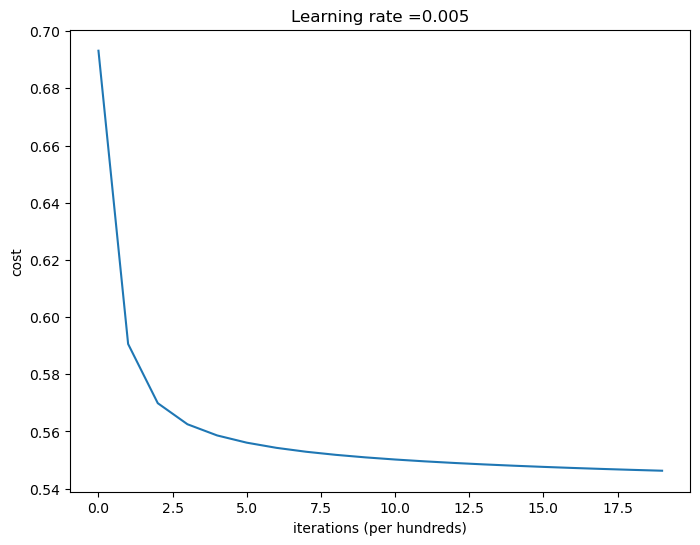

In [463]:
# Plot learning curve (with costs)
plt.figure(figsize=(8, 6)) 
costs = np.squeeze(logistic_regression_model_1['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model_1["learning_rate"]))
plt.show()

#### Observamos diferentes valores de tasas de aprendizaje y la función de costo

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.005

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



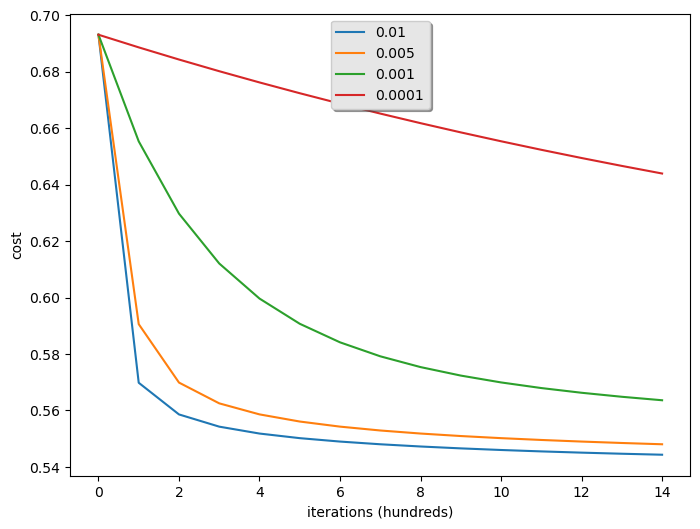

In [466]:
learning_rates = [0.01, 0.005, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    logistic_regression_model=model(train_set_x_flatten, train_set_y_array, test_set_x_flatten, test_set_y_array, num_iterations=1500, learning_rate=lr, print_cost=False)
    models[str(lr)] = logistic_regression_model[0]
    print ('\n' + "-------------------------------------------------------" + '\n')

plt.figure(figsize=(8, 6)) 
for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

#### De acuerdo al gráfico una tasa de aprendizaje de **0.01** resulta con un costo menor que la que probamos inicialmente, por lo que generamos predicciones con esta tasa de aprendizaje

In [467]:
logistic_regression_model = model(train_set_x_flatten, train_set_y_array, test_set_x_flatten, test_set_y_array, num_iterations=2000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.569823
Cost after iteration 200: 0.558596
Cost after iteration 300: 0.554265
Cost after iteration 400: 0.551820
Cost after iteration 500: 0.550190
Cost after iteration 600: 0.548980
Cost after iteration 700: 0.548022
Cost after iteration 800: 0.547234
Cost after iteration 900: 0.546567
Cost after iteration 1000: 0.545995
Cost after iteration 1100: 0.545496
Cost after iteration 1200: 0.545057
Cost after iteration 1300: 0.544667
Cost after iteration 1400: 0.544318
Cost after iteration 1500: 0.544004
Cost after iteration 1600: 0.543718
Cost after iteration 1700: 0.543457
Cost after iteration 1800: 0.543218
Cost after iteration 1900: 0.542998
train accuracy: 72.71112865035516 %
test accuracy: 72.63877926861352 %


#### Se observa que el accuracy mejora de 72.56% a 72.64% en test con la nueva tasa de aprendizaje

In [468]:
logistic_regression_model_1=logistic_regression_model[0]
A_test=logistic_regression_model[1]
A_train=logistic_regression_model[2]
A_train.shape

(1, 15204)

In [478]:
index = 7
print("\nEl individuo tenia las siguientes características en las variables:\n")
print(test_set_x_flatten[:, index])
print("\nEl individuo tenia el siguiente EVENTO:\n")
print(test_set_y_array[0,index])
print("\nEl individuo según el modelo tiene la siguiente predicción del EVENTO :\n")
print(int(logistic_regression_model_1['Y_prediction_test'][0,index]))
print("\nEl individuo según el modelo tiene el siguiente valor de probabilidad:\n")
print(A_test[:,index])


El individuo tenia las siguientes características en las variables:

[0.62562563 0.77102211 0.         0.02439024 0.05882353 0.04855372
 0.04723618 0.         0.06699014 0.0613048  0.04304524 0.
 0.00999892 0.0170644  0.04885572 0.         0.09545455 0.
 0.         0.00778483 0.00439868 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         1.         1.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         1.         0.         0.         0.
 0.         1.         0.         1. 

##### Se prepara el dataset con los valores obtenidos para generar la comparación con el modelo logístico clásico, se tomará un threshold de 0.5

In [480]:
a=pd.Series(A_train.flatten())
a.index=train_set_x_orig.index
train_set_x_orig['PROBABILIDAD_LRN']=a
#train_set_x_orig

a=pd.Series(A_test.flatten())
a.index=test_set_x_orig.index
test_set_x_orig['PROBABILIDAD_LRN']=a
#test_set_x_orig

df_aux_1 = pd.merge(train_set_x_orig, df[['CREDITO','EVENTO','FECHA_DESEMBOLSO','PROBABILIDAD']], left_index=True, right_index=True)
#df_aux_1
df_aux_2 = pd.merge(test_set_x_orig, df[['CREDITO','EVENTO','FECHA_DESEMBOLSO','PROBABILIDAD']], left_index=True, right_index=True)
#df_aux_2
df_aux_2['y_pred_LR'] = np.where(df_aux_2['PROBABILIDAD'] >= 0.5, 1, 0)
df_aux_2['y_pred_LRN'] = np.where(df_aux_2['PROBABILIDAD_LRN'] >= 0.5, 1, 0)

#### Algunas métricas de evaluación:

In [481]:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val, y_pred_labels):
    accuracy = accuracy_score(y_val, y_pred_labels)
    precision = precision_score(y_val, y_pred_labels)
    recall = recall_score(y_val, y_pred_labels)
    f1 = round(f1_score(y_val, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val, y_pred_labels)*100,2)
    logloss = round(log_loss(y_val, y_pred_labels),2)
    conf_matrix = confusion_matrix(y_val, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc,logloss

#### Métricas de desempeño para el modelo regresión logística con validación cruzada

In [482]:
cm=confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_LR'])

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(df_aux_2['EVENTO'], df_aux_2['y_pred_LR'])
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [483]:
matrix

{'Acc': 72.74,
 'Err': 27.26,
 'Re': 11.26,
 'Sp': 96.15,
 'Pre': 52.68,
 'FPR': 3.85,
 'F1': 18.55,
 'ROC_AUC': 53.7,
 'Log_Loss': 9.82}

<Axes: >

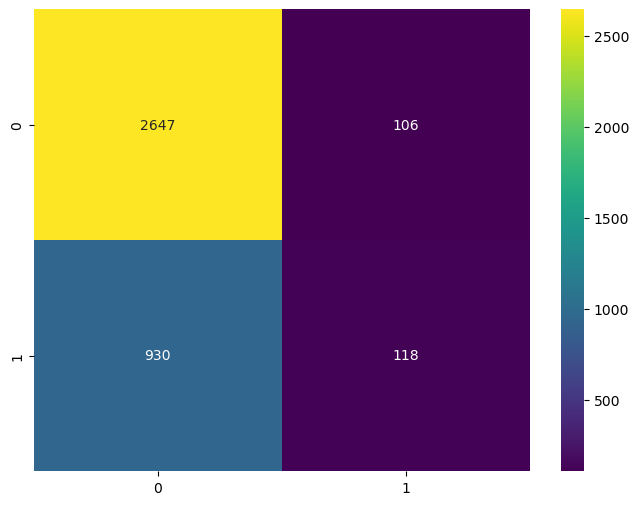

In [486]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_LR'])
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

#### Métricas de desempeño modelo propuesto

In [487]:
cm=confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_LRN'])

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(df_aux_2['EVENTO'], df_aux_2['y_pred_LRN'])
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [488]:
matrix

{'Acc': 72.64,
 'Err': 27.36,
 'Re': 8.11,
 'Sp': 97.2,
 'Pre': 52.47,
 'FPR': 2.8,
 'F1': 14.05,
 'ROC_AUC': 52.66,
 'Log_Loss': 9.86}

<Axes: >

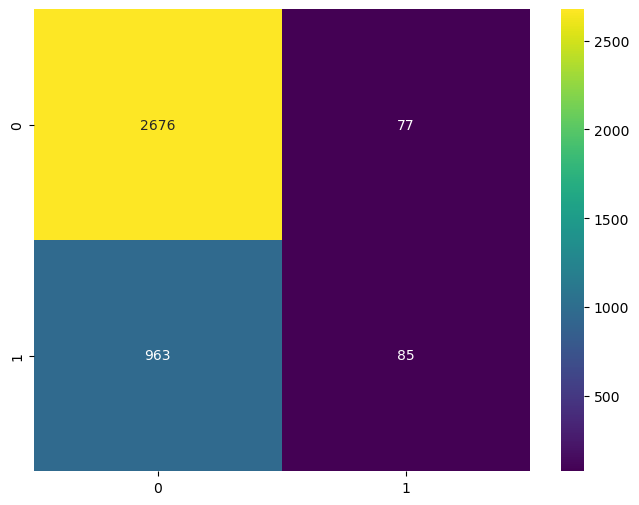

In [489]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_LRN'])
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

##### Al generar las metricas con sus respectivas matrices de confusión, observamos que el modelo de regresión logística clásico con validación cruzada tiene un mejor comportamiento en el test que el modelo propuesto de regresión logística con optimización por medio del descenso del gradiente. Se tomaron todas las variables cuantitativas que se tenían sumado a las categóricas que son una recategorización por medio de binning (frecuencias) de las variables cuantitativas sumado a las variables categóricas. 
+ Métricas modelo logístico clásico con validación cruzada
|Métrica|Valor|
|-------|-----|
|Acc| 72.74|
 |Err| 27.26|
 |Re| 11.26|
 |Sp| 96.15|
 |Pre| 52.68|
 |FPR| 3.85|
 |F1| 18.55|
 |ROC_AUC| 53.7|
 |Log_Loss| 9.82|
 
  + Métricas modelo propuesto, logístico redes neuronales con todas las variables disponibles

|Métrica|Valor|
|-------|-----|
 |Acc| 72.64|
 |Err| 27.36|
 |Re| 8.11|
 |Sp| 97.2|
 |Pre| 52.47|
 |FPR| 2.8|
 |F1| 14.05|
 |ROC_AUC| 52.66|
 |Log_Loss| 9.86|

### Realizamos el mismo ejercicio pero igualando las variables que se tuvieron en cuenta en el desarrollo del modelo logístico con validación cruzada

In [522]:
df=datos[datos['FECHA_DESEMBOLSO'] < '2023-04-01']

In [523]:
#list_cuantis=list(datos.columns)[2:24]
#list_cuantis

##### Variables usadas en el modelo logístico clásico, no tienen problemas de multicolinealidad y todas son variables dummy

In [553]:
variables=['EVENTO', 'ACTIVOS_TOTAL_3',
 'ANTIGUEDAD_NEGOCIO_1',
 'ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1',
 'CIIU_2_GENERO_1',
 'CIUDAD_1_ACTIVOS_TOTAL_1',
 'CIUDAD_1_TIPO_VIVIENDA_3',
 'CIUDAD_1_TOTAL_PASIVOS_1',
 'CIUDAD_3_EDAD_3',
 'CIUDAD_3_TIPO_VINCULACION_1',
 'EDAD_2_TIPO_VINCULACION_1',
 'EDAD_3_TIPO_VINCULACION_1',
 'ESTADO_CIVIL_1',
 'ESTADO_CIVIL_1_TIPO_VINCULACION_1',
 'SCORE_1',
 'SCORE_3',
 'SCORE_4',
 'TIPO_VIVIENDA_1',
 'TIPO_VIVIENDA_3',
 'TOTAL_PASIVOS_1',
 #'TOTAL_PASIVOS_1_ACTIVOS_TOTAL_1',
 'TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2']

In [554]:
list_cualis=variables
df1=df[variables]
#list_cualis

In [555]:
cualis=list_cualis
#cuantis=list_cuantis

#scaler = MinMaxScaler()
#scaler.fit(df1[cuantis])
#df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])
    
print(df1['EVENTO'].value_counts())

X=df1.drop(columns=["EVENTO"])
y=df1["EVENTO"]

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['EVENTO'], random_state=seed)

0    13767
1     5238
Name: EVENTO, dtype: int64


C:\Users\MathStath\AppData\Local\Temp\ipykernel_10152\1938324706.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = labelencoder.fit_transform(df1[i])
C:\Users\MathStath\AppData\Local\Temp\ipykernel_10152\1938324706.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = labelencoder.fit_transform(df1[i])
C:\Users\MathStath\AppData\Local\Temp\ipykernel_10152\1938324706.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [556]:
# Loading the data (evento/no evento)
train_set_x_orig=train.drop(columns=["EVENTO"])
train_set_y=train["EVENTO"]
test_set_x_orig=test.drop(columns=["EVENTO"])
test_set_y=test["EVENTO"]
classes = np.array([0, 1])
classes = classes.astype(str)

train_set_x_orig_array=train_set_x_orig.to_numpy()
test_set_x_orig_array=test_set_x_orig.to_numpy()
train_set_y_array=train_set_y.to_numpy()
train_set_y_array=train_set_y_array.reshape(1, -1)
test_set_y_array=test_set_y.to_numpy()
test_set_y_array=test_set_y_array.reshape(1, -1)

In [557]:
indices = train_set_x_orig.index

In [558]:
# Ejemplo de un individuo en el conjunto de entrenamiento con índice original
index = 6762
print(train_set_x_orig.loc[index])
print("\nCero representa no tener el evento")
print("Se obseva si tiene o no el evento para el individuo que se encuentra en los índices\n", train_set_y.loc[index])

ACTIVOS_TOTAL_3                            0
ANTIGUEDAD_NEGOCIO_1                       1
ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1    1
CIIU_2_GENERO_1                            0
CIUDAD_1_ACTIVOS_TOTAL_1                   0
CIUDAD_1_TIPO_VIVIENDA_3                   0
CIUDAD_1_TOTAL_PASIVOS_1                   1
CIUDAD_3_EDAD_3                            0
CIUDAD_3_TIPO_VINCULACION_1                0
EDAD_2_TIPO_VINCULACION_1                  1
EDAD_3_TIPO_VINCULACION_1                  0
ESTADO_CIVIL_1                             0
ESTADO_CIVIL_1_TIPO_VINCULACION_1          0
SCORE_1                                    0
SCORE_3                                    0
SCORE_4                                    1
TIPO_VIVIENDA_1                            1
TIPO_VIVIENDA_3                            0
TOTAL_PASIVOS_1                            1
TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2    0
Name: 6762, dtype: int64

Cero representa no tener el evento
Se obseva si tiene o no el evento para 

In [559]:
#Verificación de tamaños
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.loc[index].shape[0]

print ("Número de muestras de entrenamiento: m_train = " + str(m_train))
print ("Número de muestras de test m_test = " + str(m_test))
print ("Cantidad de características de cada individuo = " + str(num_px))
print ("train_set_x tamaño: " + str(train_set_x_orig_array.shape))
print ("train_set_y tamaño: " + str(train_set_y_array.shape))
print ("test_set_x tamaño: " + str(test_set_x_orig_array.shape))
print ("test_set_y tamaño: " + str(test_set_y_array.shape))

Número de muestras de entrenamiento: m_train = 15204
Número de muestras de test m_test = 3801
Cantidad de características de cada individuo = 20
train_set_x tamaño: (15204, 20)
train_set_y tamaño: (1, 15204)
test_set_x tamaño: (3801, 20)
test_set_y tamaño: (1, 3801)


In [560]:
train_set_x_flatten=train_set_x_orig_array.reshape(train_set_x_orig_array.shape[0],-1).T
test_set_x_flatten=test_set_x_orig_array.reshape(test_set_x_orig_array.shape[0],-1).T

In [561]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y_array.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y_array.shape))

train_set_x_flatten shape: (20, 15204)
train_set_y shape: (1, 15204)
test_set_x_flatten shape: (20, 3801)
test_set_y shape: (1, 3801)


In [562]:
logistic_regression_model = model(train_set_x_flatten, train_set_y_array, test_set_x_flatten, test_set_y_array, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.638711
Cost after iteration 200: 0.609833
Cost after iteration 300: 0.593635
Cost after iteration 400: 0.583930
Cost after iteration 500: 0.577692
Cost after iteration 600: 0.573395
Cost after iteration 700: 0.570239
Cost after iteration 800: 0.567790
Cost after iteration 900: 0.565806
Cost after iteration 1000: 0.564144
Cost after iteration 1100: 0.562718
Cost after iteration 1200: 0.561473
Cost after iteration 1300: 0.560373
Cost after iteration 1400: 0.559392
Cost after iteration 1500: 0.558512
Cost after iteration 1600: 0.557718
Cost after iteration 1700: 0.556998
Cost after iteration 1800: 0.556343
Cost after iteration 1900: 0.555745
train accuracy: 72.44146277295448 %
test accuracy: 72.42830833991056 %


In [563]:
logistic_regression_model_1=logistic_regression_model[0]
A_test=logistic_regression_model[1]
A_train=logistic_regression_model[2]

In [564]:
index = 7
print("\nEl individuo tenia las siguientes características en las variables:\n")
print(test_set_x_flatten[:, index])
print("\nEl individuo tenia el siguiente EVENTO:\n")
print(test_set_y_array[0,index])
print("\nEl individuo según el modelo tiene la siguiente predicción del EVENTO :\n")
print(int(logistic_regression_model_1['Y_prediction_test'][0,index]))
print("\nEl individuo según el modelo tiene el siguiente valor de probabilidad:\n")
print(A_test[:,index])


El individuo tenia las siguientes características en las variables:

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]

El individuo tenia el siguiente EVENTO:

0

El individuo según el modelo tiene la siguiente predicción del EVENTO :

0

El individuo según el modelo tiene el siguiente valor de probabilidad:

[0.37731888]


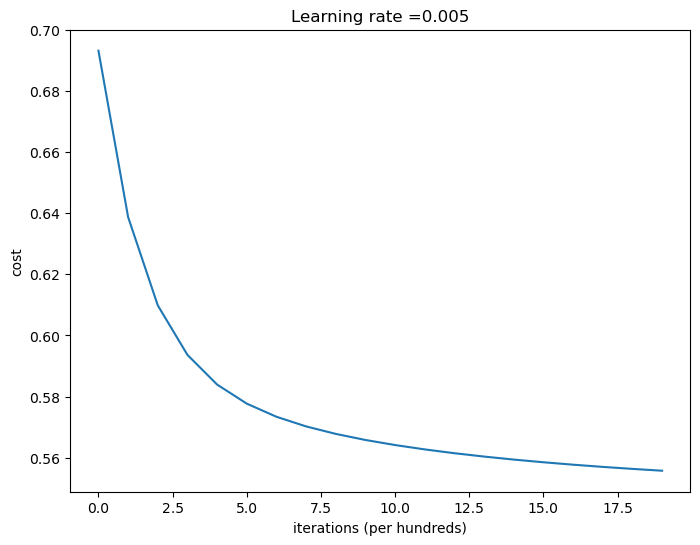

In [565]:
# Plot learning curve (with costs)
plt.figure(figsize=(8, 6))
costs = np.squeeze(logistic_regression_model_1['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model_1["learning_rate"]))
plt.show()

#### Observamos diferentes valores de tasas de aprendizaje y la función de costo

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.005

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



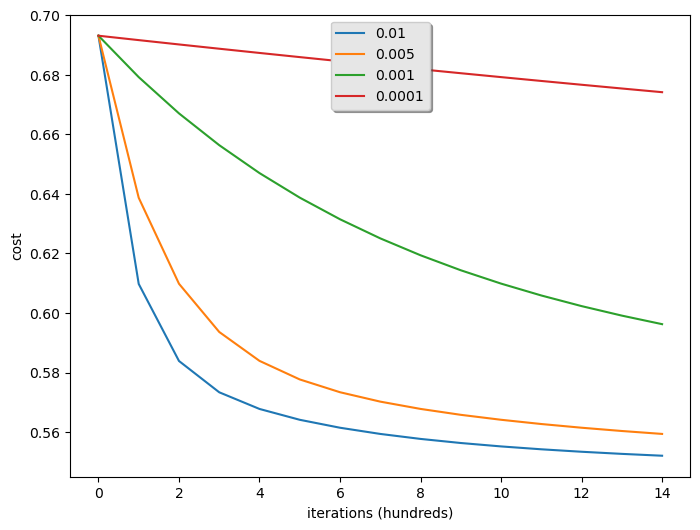

In [566]:
learning_rates = [0.01, 0.005, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    logistic_regression_model=model(train_set_x_flatten, train_set_y_array, test_set_x_flatten, test_set_y_array, num_iterations=1500, learning_rate=lr, print_cost=False)
    models[str(lr)] = logistic_regression_model[0]
    print ('\n' + "-------------------------------------------------------" + '\n')
plt.figure(figsize=(8, 6))
for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

#### De acuerdo al gráfico una tasa de aprendizaje de 0.01 resulta con un costo menor que la que probamos inicialmente, por lo que generamos predicciones con esta tasa de aprendizaje

In [567]:
logistic_regression_model = model(train_set_x_flatten, train_set_y_array, test_set_x_flatten, test_set_y_array, num_iterations=2000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.609770
Cost after iteration 200: 0.583893
Cost after iteration 300: 0.573375
Cost after iteration 400: 0.567779
Cost after iteration 500: 0.564137
Cost after iteration 600: 0.561468
Cost after iteration 700: 0.559388
Cost after iteration 800: 0.557714
Cost after iteration 900: 0.556339
Cost after iteration 1000: 0.555194
Cost after iteration 1100: 0.554228
Cost after iteration 1200: 0.553403
Cost after iteration 1300: 0.552691
Cost after iteration 1400: 0.552069
Cost after iteration 1500: 0.551521
Cost after iteration 1600: 0.551034
Cost after iteration 1700: 0.550596
Cost after iteration 1800: 0.550199
Cost after iteration 1900: 0.549838
train accuracy: 72.69797421731124 %
test accuracy: 72.8492501973165 %


#### Se observa que el accuracy mejora levemente con esta tasa de aprendizaje

In [568]:
logistic_regression_model_1=logistic_regression_model[0]
A_test=logistic_regression_model[1]
A_train=logistic_regression_model[2]

In [569]:
A_train.shape

(1, 15204)

In [570]:
index = 7
print("\nEl individuo tenia las siguientes características en las variables:\n")
print(test_set_x_flatten[:, index])
print("\nEl individuo tenia el siguiente EVENTO:\n")
print(test_set_y_array[0,index])
print("\nEl individuo según el modelo tiene la siguiente predicción del EVENTO :\n")
print(int(logistic_regression_model_1['Y_prediction_test'][0,index]))
print("\nEl individuo según el modelo tiene el siguiente valor de probabilidad:\n")
print(A_test[:,index])


El individuo tenia las siguientes características en las variables:

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]

El individuo tenia el siguiente EVENTO:

0

El individuo según el modelo tiene la siguiente predicción del EVENTO :

0

El individuo según el modelo tiene el siguiente valor de probabilidad:

[0.38294425]


In [571]:
a=pd.Series(A_train.flatten())
a.index=train_set_x_orig.index
train_set_x_orig['PROBABILIDAD_LRN']=a
train_set_x_orig

a=pd.Series(A_test.flatten())
a.index=test_set_x_orig.index
test_set_x_orig['PROBABILIDAD_LRN']=a
test_set_x_orig

,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,CIUDAD_3_EDAD_3,CIUDAD_3_TIPO_VINCULACION_1,EDAD_2_TIPO_VINCULACION_1,...,ESTADO_CIVIL_1,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,PROBABILIDAD_LRN
9156,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0.237036
15017,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.321308
1807,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0.167034
17987,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.453956
16056,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0.281220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0.312358
13058,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0.402300
6806,0,0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0.464620
11785,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0.305350


In [572]:
df_aux_1 = pd.merge(train_set_x_orig, df[['CREDITO','EVENTO','FECHA_DESEMBOLSO','PROBABILIDAD']], left_index=True, right_index=True)
#df_aux_1
df_aux_2 = pd.merge(test_set_x_orig, df[['CREDITO','EVENTO','FECHA_DESEMBOLSO','PROBABILIDAD']], left_index=True, right_index=True)
#df_aux_2 
df_aux_2['y_pred_LR'] = np.where(df_aux_2['PROBABILIDAD'] >= 0.5, 1, 0)
df_aux_2['y_pred_LRN'] = np.where(df_aux_2['PROBABILIDAD_LRN'] >= 0.5, 1, 0)

In [573]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val, y_pred_labels):
    accuracy = accuracy_score(y_val, y_pred_labels)
    precision = precision_score(y_val, y_pred_labels)
    recall = recall_score(y_val, y_pred_labels)
    f1 = round(f1_score(y_val, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val, y_pred_labels)*100,2)
    logloss = round(log_loss(y_val, y_pred_labels),2)
    conf_matrix = confusion_matrix(y_val, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc,logloss

In [574]:
cm=confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_LR'])

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(df_aux_2['EVENTO'], df_aux_2['y_pred_LR'])
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [575]:
matrix

{'Acc': 72.74,
 'Err': 27.26,
 'Re': 11.26,
 'Sp': 96.15,
 'Pre': 52.68,
 'FPR': 3.85,
 'F1': 18.55,
 'ROC_AUC': 53.7,
 'Log_Loss': 9.82}

<Axes: >

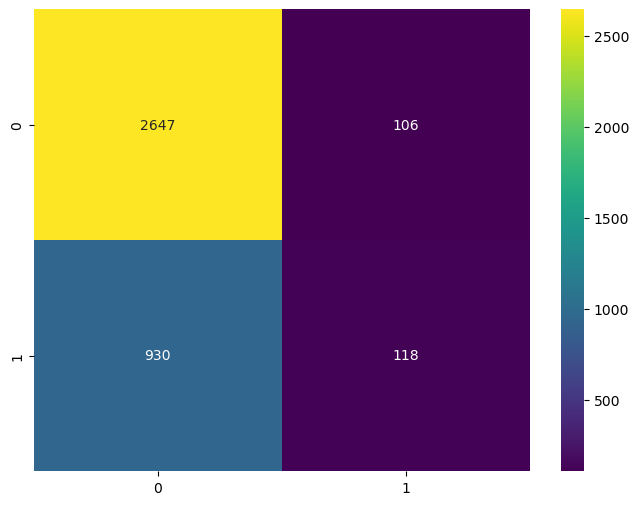

In [576]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_LR'])
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [577]:
cm=confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_LRN'])

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(df_aux_2['EVENTO'], df_aux_2['y_pred_LRN'])
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [578]:
matrix

{'Acc': 72.85,
 'Err': 27.15,
 'Re': 3.72,
 'Sp': 99.16,
 'Pre': 62.9,
 'FPR': 0.84,
 'F1': 7.03,
 'ROC_AUC': 51.44,
 'Log_Loss': 9.79}

<Axes: >

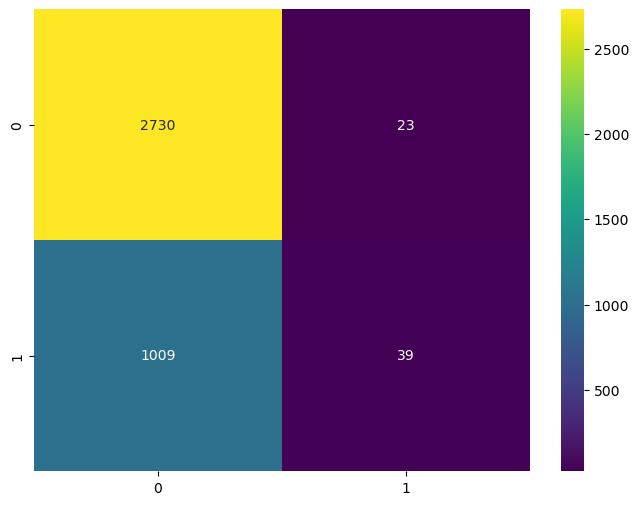

In [579]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_LRN'])
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

#### Se observa que el modelo propuesto es bastante malo comparado con el modelo clásico con validación cruzada.

+ Métricas modelo logístico clásico con validación cruzada
|Métrica|Valor|
|-------|-----|
|Acc| 72.74|
 |Err| 27.26|
 |Re| 11.26|
 |Sp| 96.15|
 |Pre| 52.68|
 |FPR| 3.85|
 |F1| 18.55|
 |ROC_AUC| 53.7|
 |Log_Loss| 9.82|
 
  + Métricas modelo propuesto, logístico redes neuronales con todas las variables disponibles

|Métrica|Valor|
|-------|-----|
 |Acc| 72.64|
 |Err| 27.36|
 |Re| 8.11|
 |Sp| 97.2|
 |Pre| 52.47|
 |FPR| 2.8|
 |F1| 14.05|
 |ROC_AUC| 52.66|
 |Log_Loss| 9.86|
 
  + Métricas modelo propuesto, logístico redes neuronales con solo las variables que se tomaron para el modelo clásico

|Métrica|Valor|
|-------|-----|
 |Acc| 72.85|
 |Err| 27.15|
 |Re| 3.72|
 |Sp| 99.16|
 |Pre| 62.9|
 |FPR| 0.84|
 |F1| 7.03|
 |ROC_AUC| 51.44|
 |Log_Loss| 9.79|

## Deep Neuronal Network

In [581]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [625]:
df=datos[datos['FECHA_DESEMBOLSO'] < '2023-04-01']
list_cuantis=list(datos.columns)[2:24]
#list_cuantis
list_cualis=['EVENTO']+list(datos.columns)[24:137]
#list_cualis
df1=df.drop(columns=["CREDITO","FECHA_DESEMBOLSO", "PROBABILIDAD"])

In [626]:
cualis=list_cualis
cuantis=list_cuantis

scaler = MinMaxScaler()
scaler.fit(df1[cuantis])
df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])
    
print(df1['EVENTO'].value_counts())

X=df1.drop(columns=["EVENTO"])
y=df1["EVENTO"]

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['EVENTO'], random_state=seed)

0    13767
1     5238
Name: EVENTO, dtype: int64


In [627]:
# Loading the data (evento/no evento)
train_set_x_orig=train.drop(columns=["EVENTO"])
train_set_y=train["EVENTO"]
test_set_x_orig=test.drop(columns=["EVENTO"])
test_set_y=test["EVENTO"]
classes = np.array([0, 1])
classes = classes.astype(str)

train_set_x_orig_array=train_set_x_orig.to_numpy()
test_set_x_orig_array=test_set_x_orig.to_numpy()
train_set_y_array=train_set_y.to_numpy()
train_set_y_array=train_set_y_array.reshape(1, -1)
test_set_y_array=test_set_y.to_numpy()
test_set_y_array=test_set_y_array.reshape(1, -1)

In [628]:
indices = train_set_x_orig.index
# Ejemplo de un individuo en el conjunto de entrenamiento con índice original
index = 6762
print(train_set_x_orig.loc[index])
print("\nCero representa no tener el evento")
print("Se obseva si tiene o no el evento para el individuo que se encuentra en los índices\n", train_set_y.loc[index])

SCORE                             0.942943
EDAD                              0.248550
NUMERO_HIJOS                      0.047619
PERSONAS_A_CARGO                  0.048780
EXPERIENCIA_ACTIVIDAD             0.663866
                                    ...   
ACTIVOS_TOTAL_3_ESTADO_CIVIL_3    0.000000
SCORE_4_GENERO_1                  1.000000
CIIU_6_TIPO_VINCULACION_1         0.000000
VENTAS_2_GENERO_1                 1.000000
CIUDAD_3_ESTADO_CIVIL_3           0.000000
Name: 6762, Length: 135, dtype: float64

Cero representa no tener el evento
Se obseva si tiene o no el evento para el individuo que se encuentra en los índices
 0


In [629]:
#Verificación de tamaños
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.loc[index].shape[0]

print ("Número de muestras de entrenamiento: m_train = " + str(m_train))
print ("Número de muestras de test m_test = " + str(m_test))
print ("Cantidad de características de cada individuo = " + str(num_px))
print ("train_set_x tamaño: " + str(train_set_x_orig_array.shape))
print ("train_set_y tamaño: " + str(train_set_y_array.shape))
print ("test_set_x tamaño: " + str(test_set_x_orig_array.shape))
print ("test_set_y tamaño: " + str(test_set_y_array.shape))

Número de muestras de entrenamiento: m_train = 15204
Número de muestras de test m_test = 3801
Cantidad de características de cada individuo = 135
train_set_x tamaño: (15204, 135)
train_set_y tamaño: (1, 15204)
test_set_x tamaño: (3801, 135)
test_set_y tamaño: (1, 3801)


In [630]:
train_set_x_flatten=train_set_x_orig_array.reshape(train_set_x_orig_array.shape[0],-1).T
test_set_x_flatten=test_set_x_orig_array.reshape(test_set_x_orig_array.shape[0],-1).T

In [631]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y_array.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y_array.shape))

train_set_x_flatten shape: (135, 15204)
train_set_y shape: (1, 15204)
test_set_x_flatten shape: (135, 3801)
test_set_y shape: (1, 3801)


#### Tomando dos capas en donde la primera capa tiene 2 neuronas

In [656]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 135     
n_h = 2
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.01

In [657]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(seed)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, 
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')

        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        
        dA1, dW2, db2 =  linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 =  linear_activation_backward(dA1, cache1, activation='relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate=0.01):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [658]:
parameters, costs = two_layer_model(train_set_x_flatten, train_set_y_array, layers_dims = (n_x, n_h, n_y), num_iterations = 2, print_cost=False)
print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 1: 0.6927947624727784
Cost after first iteration: 0.6933003353146253


Cost after iteration 0: 0.6933003353146253
Cost after iteration 100: 0.653479481841139
Cost after iteration 200: 0.6292665539848978
Cost after iteration 300: 0.6143767832873587
Cost after iteration 400: 0.6051052955643685
Cost after iteration 500: 0.5992602472797296
Cost after iteration 600: 0.5955307455405333
Cost after iteration 700: 0.5931215330465606
Cost after iteration 800: 0.5915421270992797
Cost after iteration 900: 0.5904846773151139
Cost after iteration 1000: 0.5897519049601312
Cost after iteration 1100: 0.5892138506595628
Cost after iteration 1200: 0.5887814295108289
Cost after iteration 1300: 0.5883902462951363
Cost after iteration 1400: 0.5879898663483651
Cost after iteration 1500: 0.5875359312831286
Cost after iteration 1600: 0.5869843409262127
Cost after iteration 1700: 0.5862916672311317
Cost after iteration 1800: 0.5854136585161265
Cost after iteration 1900: 0.5843041904419836
Cost after iteration 2000: 0.5829246121752207
Cost after iteration 2100: 0.5812423447548881
C

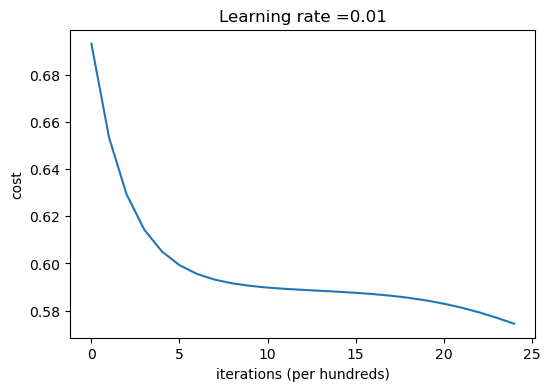

In [659]:
parameters, costs = two_layer_model(train_set_x_flatten, train_set_y_array, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plt.figure(figsize=(6, 4)) 
plot_costs(costs, learning_rate)

In [660]:
predictions_train = predict(train_set_x_flatten, train_set_y_array, parameters)

Accuracy: 0.7244146277295449


In [661]:
predictions_test = predict(test_set_x_flatten, test_set_y_array, parameters)

Accuracy: 0.7242830833991056


In [662]:
predictions_test

array([[0., 0., 0., ..., 0., 0., 0.]])

In [663]:
# Verificar si hay algún 1 en el arreglo
has_one = np.any(predictions_test == 1)

print("¿Hay algún 1 en el arreglo?", has_one)

¿Hay algún 1 en el arreglo? False


In [664]:
a=pd.Series(predictions_test.flatten())
a.index=df_aux_2.index
df_aux_2['y_pred_DNN_1']=a
df_aux_2['y_pred_DNN_1'] = df_aux_2['y_pred_DNN_1'].astype(int)

In [665]:
cm=confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_1'])

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_1'])
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

C:\Users\MathStath\AppData\Local\Temp\ipykernel_10152\1709042303.py:12: RuntimeWarning: invalid value encountered in scalar divide
  prec = round((TP / (TP + FP))*100,2)                          #Precision
C:\Users\MathStath\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [666]:
matrix

{'Acc': 72.43,
 'Err': 27.57,
 'Re': 0.0,
 'Sp': 100.0,
 'Pre': nan,
 'FPR': 0.0,
 'F1': 0.0,
 'ROC_AUC': 50.0,
 'Log_Loss': 9.94}

<Axes: >

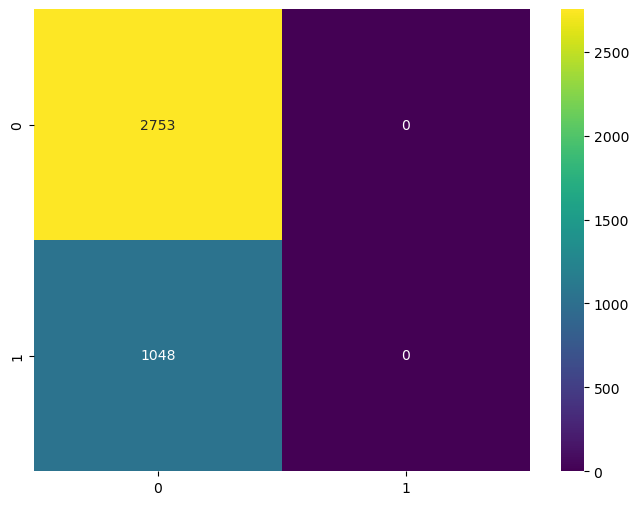

In [667]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_1'])
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

##### El comportamiento es muy malo ya que no detecta verdaderos positivos, a continuación tomamos 8 neuronas en la primera capa

In [668]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 135     
n_h = 8
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.01

In [669]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(seed)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, 
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')

        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        
        dA1, dW2, db2 =  linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 =  linear_activation_backward(dA1, cache1, activation='relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate=0.01):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [670]:
parameters, costs = two_layer_model(train_set_x_flatten, train_set_y_array, layers_dims = (n_x, n_h, n_y), num_iterations = 2, print_cost=False)
print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 1: 0.6927440604270738
Cost after first iteration: 0.6932504688392886


Cost after iteration 0: 0.6932504688392886
Cost after iteration 100: 0.6533511728546852
Cost after iteration 200: 0.6290443164990333
Cost after iteration 300: 0.6140080778417063
Cost after iteration 400: 0.604505620675459
Cost after iteration 500: 0.5983154730727432
Cost after iteration 600: 0.5940934615483058
Cost after iteration 700: 0.5910028288218857
Cost after iteration 800: 0.5885021756991177
Cost after iteration 900: 0.5862354475403457
Cost after iteration 1000: 0.5839915740460694
Cost after iteration 1100: 0.5816918350415566
Cost after iteration 1200: 0.5793164265390396
Cost after iteration 1300: 0.5768920459830478
Cost after iteration 1400: 0.5744729585758914
Cost after iteration 1500: 0.5721242451103925
Cost after iteration 1600: 0.5698948154735483
Cost after iteration 1700: 0.5678059987816887
Cost after iteration 1800: 0.5658741959355297
Cost after iteration 1900: 0.5641036141119865
Cost after iteration 2000: 0.5624875287786779
Cost after iteration 2100: 0.5610183363273212
C

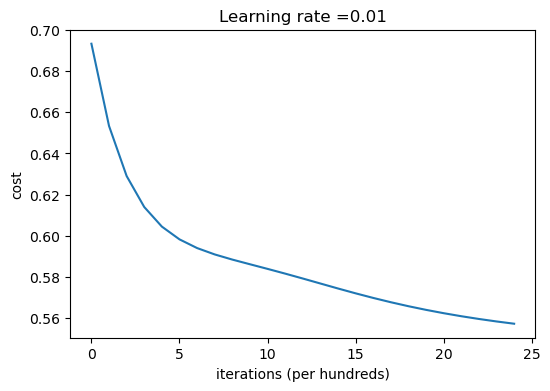

In [671]:
parameters, costs = two_layer_model(train_set_x_flatten, train_set_y_array, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plt.figure(figsize=(6, 4)) 
plot_costs(costs, learning_rate)

In [672]:
predictions_train = predict(train_set_x_flatten, train_set_y_array, parameters)

Accuracy: 0.7244146277295449


In [673]:
predictions_test = predict(test_set_x_flatten, test_set_y_array, parameters)

Accuracy: 0.7242830833991056


In [674]:
predictions_test

array([[0., 0., 0., ..., 0., 0., 0.]])

In [675]:
# Verificar si hay algún 1 en el arreglo
has_one = np.any(predictions_test == 1)

print("¿Hay algún 1 en el arreglo?", has_one)

¿Hay algún 1 en el arreglo? False


In [676]:
a=pd.Series(predictions_test.flatten())
a.index=df_aux_2.index
df_aux_2['y_pred_DNN_2']=a
df_aux_2['y_pred_DNN_2'] = df_aux_2['y_pred_DNN_2'].astype(int)

In [677]:
cm=confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_2'])

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_2'])
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

C:\Users\MathStath\AppData\Local\Temp\ipykernel_10152\1709042303.py:12: RuntimeWarning: invalid value encountered in scalar divide
  prec = round((TP / (TP + FP))*100,2)                          #Precision
C:\Users\MathStath\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [678]:
matrix

{'Acc': 72.43,
 'Err': 27.57,
 'Re': 0.0,
 'Sp': 100.0,
 'Pre': nan,
 'FPR': 0.0,
 'F1': 0.0,
 'ROC_AUC': 50.0,
 'Log_Loss': 9.94}

<Axes: >

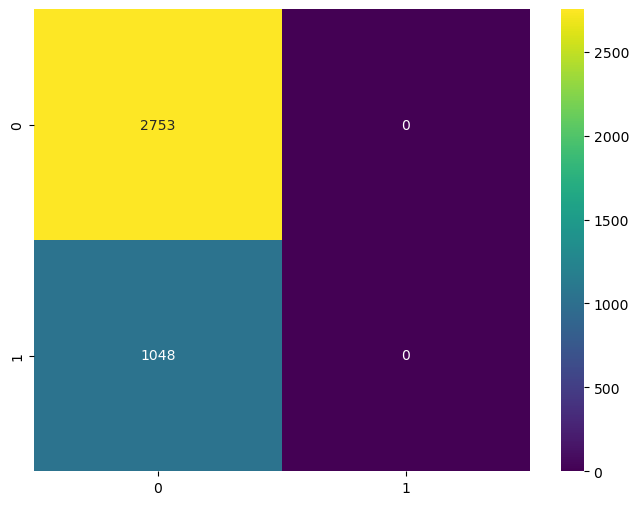

In [679]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_1'])
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

### Construyendo una red neuronal más profunda, más capas, en este caso duplicamos las capas a 4

In [706]:
### CONSTANTS ###
layers_dims = [135, 12, 9, 3, 1] #  4-layer model

In [707]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(seed)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.       
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [708]:
parameters, costs = L_layer_model(train_set_x_flatten, train_set_y_array, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 0: 0.6960594970898839
Cost after first iteration: 0.6960594970898839


In [709]:
parameters, costs = L_layer_model(train_set_x_flatten, train_set_y_array, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.6960594970898839
Cost after iteration 100: 0.607639782645133
Cost after iteration 200: 0.5763877931504636
Cost after iteration 300: 0.5666236940799277
Cost after iteration 400: 0.5614367104532048
Cost after iteration 500: 0.5580784383990284
Cost after iteration 600: 0.5556710900621379
Cost after iteration 700: 0.5537899481881239
Cost after iteration 800: 0.5522795125380578
Cost after iteration 900: 0.5510498426782587
Cost after iteration 1000: 0.5499891695893024
Cost after iteration 1100: 0.5490428761679707
Cost after iteration 1200: 0.5482128917326153
Cost after iteration 1300: 0.5474705423146609
Cost after iteration 1400: 0.5468107223177784
Cost after iteration 1500: 0.5462045057907916
Cost after iteration 1600: 0.5456559009429278
Cost after iteration 1700: 0.5451556541215826
Cost after iteration 1800: 0.5446920746888704
Cost after iteration 1900: 0.5442655772715407
Cost after iteration 2000: 0.5438752068800988
Cost after iteration 2100: 0.5435263089697708
C

In [710]:
pred_train = predict(train_set_x_flatten, train_set_y_array, parameters)

Accuracy: 0.7278347803209683


In [711]:
pred_test = predict(test_set_x_flatten, test_set_y_array, parameters)

Accuracy: 0.7287555906340437


In [712]:
pred_test

array([[0., 0., 0., ..., 0., 0., 0.]])

In [713]:
# Verificar si hay algún 1 en el arreglo
has_one = np.any(predictions_test == 1)

print("¿Hay algún 1 en el arreglo?", has_one)

¿Hay algún 1 en el arreglo? False


In [714]:
index = 7
print("\nEl individuo tenia las siguientes características en las variables:\n")
print(test_set_x_flatten[:, index])
print("\nEl individuo tenia el siguiente EVENTO:\n")
print(test_set_y_array[0,index])
print("\nEl individuo según el modelo tiene la siguiente predicción del EVENTO :\n")
print(int(pred_test[:,index]))


El individuo tenia las siguientes características en las variables:

[0.62562563 0.77102211 0.         0.02439024 0.05882353 0.04855372
 0.04723618 0.         0.06699014 0.0613048  0.04304524 0.
 0.00999892 0.0170644  0.04885572 0.         0.09545455 0.
 0.         0.00778483 0.00439868 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         1.         1.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         1.         0.         0.         0.
 0.         1.         0.         1. 

In [715]:
a=pd.Series(pred_test.flatten())
a.index=test_set_x_orig.index
df_aux_2['y_pred_DNN_2']=a
df_aux_2['y_pred_DNN_2']=df_aux_2['y_pred_DNN_2'].astype(int)

In [716]:
cm=confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_2'])

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_2'])
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [717]:
matrix

{'Acc': 72.88,
 'Err': 27.12,
 'Re': 7.16,
 'Sp': 97.89,
 'Pre': 56.39,
 'FPR': 2.11,
 'F1': 12.7,
 'ROC_AUC': 52.52,
 'Log_Loss': 9.78}

<Axes: >

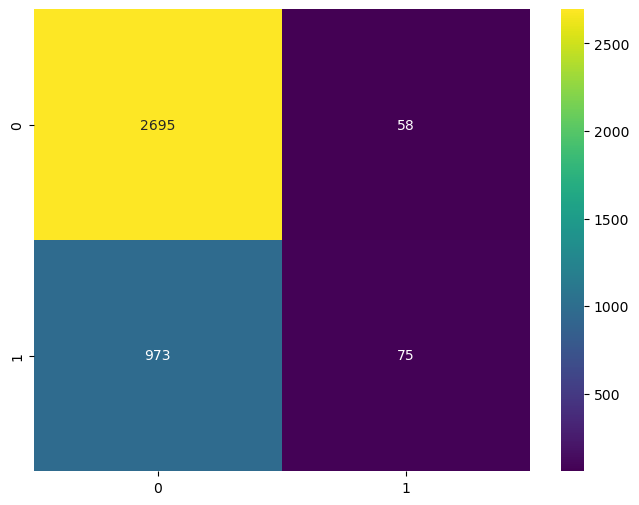

In [718]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_2'])
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

### Construyendo una red neuronal más profunda, cuatro capas con 12 neuronas las 3 primeras y una la última

In [719]:
### CONSTANTS ###
layers_dims = [135, 12, 12, 12, 1] #  4-layer model

In [720]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(seed)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.       
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [721]:
parameters, costs = L_layer_model(train_set_x_flatten, train_set_y_array, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 0: 0.6936107918241994
Cost after first iteration: 0.6936107918241994


In [722]:
parameters, costs = L_layer_model(train_set_x_flatten, train_set_y_array, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.6936107918241994
Cost after iteration 100: 0.6343487304138667
Cost after iteration 200: 0.6056285699780524
Cost after iteration 300: 0.5904237874827288
Cost after iteration 400: 0.5818178902502897
Cost after iteration 500: 0.5764141050602934
Cost after iteration 600: 0.5724360394644823
Cost after iteration 700: 0.5692005967542194
Cost after iteration 800: 0.5664896898500218
Cost after iteration 900: 0.5641362076360601
Cost after iteration 1000: 0.5621026790740902
Cost after iteration 1100: 0.5603342661329638
Cost after iteration 1200: 0.5588014201447639
Cost after iteration 1300: 0.5574548160802312
Cost after iteration 1400: 0.5562602893013997
Cost after iteration 1500: 0.5551957862869649
Cost after iteration 1600: 0.5542321692959924
Cost after iteration 1700: 0.5533550117664479
Cost after iteration 1800: 0.5525416650149683
Cost after iteration 1900: 0.5517895095703794
Cost after iteration 2000: 0.551089197141759
Cost after iteration 2100: 0.5504383408686264
C

In [723]:
pred_train = predict(train_set_x_flatten, train_set_y_array, parameters)

Accuracy: 0.7244146277295449


In [724]:
pred_test = predict(test_set_x_flatten, test_set_y_array, parameters)

Accuracy: 0.7242830833991056


In [725]:
pred_test

array([[0., 0., 0., ..., 0., 0., 0.]])

In [731]:
# Verificar si hay algún 1 en el arreglo
has_one = np.any(predictions_test == 1)

print("¿Hay algún 1 en el arreglo?", has_one)

¿Hay algún 1 en el arreglo? False


In [726]:
index = 7
print("\nEl individuo tenia las siguientes características en las variables:\n")
print(test_set_x_flatten[:, index])
print("\nEl individuo tenia el siguiente EVENTO:\n")
print(test_set_y_array[0,index])
print("\nEl individuo según el modelo tiene la siguiente predicción del EVENTO :\n")
print(int(pred_test[:,index]))


El individuo tenia las siguientes características en las variables:

[0.62562563 0.77102211 0.         0.02439024 0.05882353 0.04855372
 0.04723618 0.         0.06699014 0.0613048  0.04304524 0.
 0.00999892 0.0170644  0.04885572 0.         0.09545455 0.
 0.         0.00778483 0.00439868 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         1.         1.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         1.         0.         0.         0.
 0.         1.         0.         1. 

In [727]:
a=pd.Series(pred_test.flatten())
a.index=test_set_x_orig.index
df_aux_2['y_pred_DNN_3']=a
df_aux_2['y_pred_DNN_3']=df_aux_2['y_pred_DNN_3'].astype(int)

In [728]:
cm=confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_3'])

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_3'])
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

C:\Users\MathStath\AppData\Local\Temp\ipykernel_10152\1709042303.py:12: RuntimeWarning: invalid value encountered in scalar divide
  prec = round((TP / (TP + FP))*100,2)                          #Precision
C:\Users\MathStath\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [729]:
matrix

{'Acc': 72.43,
 'Err': 27.57,
 'Re': 0.0,
 'Sp': 100.0,
 'Pre': nan,
 'FPR': 0.0,
 'F1': 0.0,
 'ROC_AUC': 50.0,
 'Log_Loss': 9.94}

<Axes: >

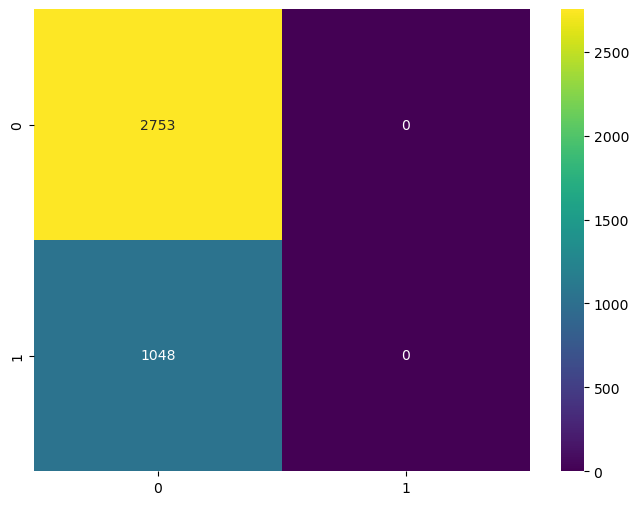

In [730]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_3'])
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

### Modelo secuencial con capas densas
##### A continuación probaremos con un modelo con cuatro capas densas con 20 neuronas cada uno, activación RELU y como regularización pondremos un DROPOU del 20% para evitar sobre ajuste y por último tendremos la capa con una neurona y activación sigmoide

In [775]:
import tensorflow as tf

In [776]:
modelo = tf.keras.models.Sequential()
modelo.add( tf.keras.layers.Dense(units=20, activation='relu', input_shape=(135, )))
modelo.add(tf.keras.layers.Dense(units=20, activation='relu'))
modelo.add(tf.keras.layers.Dense(units=20, activation='relu'))
modelo.add( tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
modelo.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [777]:
print ("Número de muestras de entrenamiento: m_train = " + str(m_train))
print ("Número de muestras de test m_test = " + str(m_test))
print ("Cantidad de características de cada individuo = " + str(num_px))
print ("train_set_x tamaño: " + str(train_set_x_orig_array.shape))
print ("train_set_y tamaño: " + str(train_set_y_array.shape))
print ("test_set_x tamaño: " + str(test_set_x_orig_array.shape))
print ("test_set_y tamaño: " + str(test_set_y_array.shape))

Número de muestras de entrenamiento: m_train = 15204
Número de muestras de test m_test = 3801
Cantidad de características de cada individuo = 135
train_set_x tamaño: (15204, 135)
train_set_y tamaño: (1, 15204)
test_set_x tamaño: (3801, 135)
test_set_y tamaño: (1, 3801)


In [778]:
epoch = modelo.fit(train_set_x_orig_array, train_set_y_array.T, epochs = 50)

Epoch 1/50
476/476 [==============================] - 5s 5ms/step - loss: 0.5635 - accuracy: 0.7201
Epoch 2/50
476/476 [==============================] - 2s 4ms/step - loss: 0.5480 - accuracy: 0.7254
Epoch 3/50
476/476 [==============================] - 2s 3ms/step - loss: 0.5444 - accuracy: 0.7262
Epoch 4/50
476/476 [==============================] - 2s 4ms/step - loss: 0.5423 - accuracy: 0.7270
Epoch 5/50
476/476 [==============================] - 2s 4ms/step - loss: 0.5403 - accuracy: 0.7268
Epoch 6/50
476/476 [==============================] - 2s 4ms/step - loss: 0.5372 - accuracy: 0.7303
Epoch 7/50
476/476 [==============================] - 2s 4ms/step - loss: 0.5376 - accuracy: 0.7314
Epoch 8/50
476/476 [==============================] - 2s 4ms/step - loss: 0.5354 - accuracy: 0.7305
Epoch 9/50
476/476 [==============================] - 2s 4ms/step - loss: 0.5340 - accuracy: 0.7309
Epoch 10/50
476/476 [==============================] - 2s 5ms/step - loss: 0.5323 - accuracy: 0.7324

In [779]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                2720      
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 3581 (13.99 KB)
Trainable params: 3581 (13.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [780]:
predict=modelo.predict(test_set_x_orig_array)

119/119 [==============================] - 1s 3ms/step


In [781]:
predict.shape

(3801, 1)

In [782]:
a=pd.Series(predict.flatten())
a.index=df_aux_2.index
df_aux_2['PROBABILIDAD_DNN_4']=a
df_aux_2

df_aux_2['y_pred_DNN_4'] = np.where(df_aux_2['PROBABILIDAD_DNN_4'] >= 0.5, 1, 0)
df_aux_2['y_pred_DNN_4'] = df_aux_2['y_pred_DNN_4'].astype(int)

In [783]:
cm=confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_4'])

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_4'])
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [784]:
matrix

{'Acc': 71.72,
 'Err': 28.28,
 'Re': 18.8,
 'Sp': 91.86,
 'Pre': 46.79,
 'FPR': 8.14,
 'F1': 26.82,
 'ROC_AUC': 55.33,
 'Log_Loss': 10.19}

<Axes: >

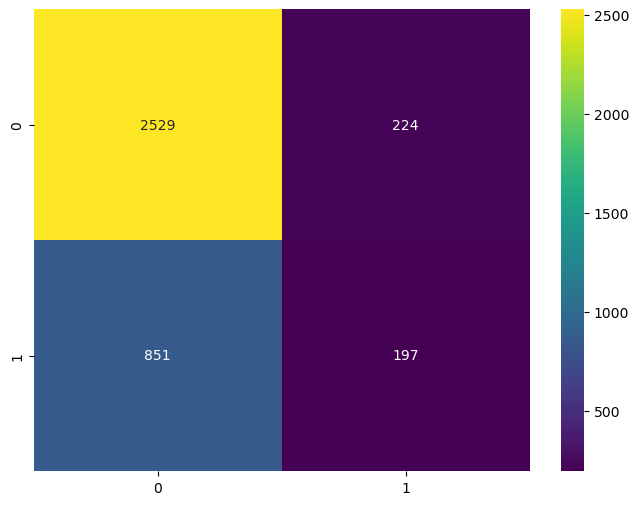

In [785]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_4'])
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

### Segundo modelo secuencial con capas densas
##### A continuación probaremos con un modelo con cuatro capas densas con 50 neuronas cada uno, activación RELU y como regularización pondremos un DROPOU del 20% para evitar sobre ajuste y por último tendremos la capa con una neurona y activación sigmoide

In [786]:
import tensorflow as tf

In [787]:
modelo = tf.keras.models.Sequential()
modelo.add( tf.keras.layers.Dense(units=50, activation='relu', input_shape=(135, )))
modelo.add(tf.keras.layers.Dense(units=50, activation='relu'))
modelo.add(tf.keras.layers.Dense(units=50, activation='relu'))
modelo.add( tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
modelo.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [788]:
print ("Número de muestras de entrenamiento: m_train = " + str(m_train))
print ("Número de muestras de test m_test = " + str(m_test))
print ("Cantidad de características de cada individuo = " + str(num_px))
print ("train_set_x tamaño: " + str(train_set_x_orig_array.shape))
print ("train_set_y tamaño: " + str(train_set_y_array.shape))
print ("test_set_x tamaño: " + str(test_set_x_orig_array.shape))
print ("test_set_y tamaño: " + str(test_set_y_array.shape))

Número de muestras de entrenamiento: m_train = 15204
Número de muestras de test m_test = 3801
Cantidad de características de cada individuo = 135
train_set_x tamaño: (15204, 135)
train_set_y tamaño: (1, 15204)
test_set_x tamaño: (3801, 135)
test_set_y tamaño: (1, 3801)


In [789]:
epoch = modelo.fit(train_set_x_orig_array, train_set_y_array.T, epochs = 100)

Epoch 1/100
476/476 [==============================] - 3s 4ms/step - loss: 0.5549 - accuracy: 0.7228
Epoch 2/100
476/476 [==============================] - 2s 4ms/step - loss: 0.5438 - accuracy: 0.7267
Epoch 3/100
476/476 [==============================] - 2s 4ms/step - loss: 0.5402 - accuracy: 0.7276
Epoch 4/100
476/476 [==============================] - 2s 4ms/step - loss: 0.5376 - accuracy: 0.7277
Epoch 5/100
476/476 [==============================] - 2s 4ms/step - loss: 0.5341 - accuracy: 0.7305
Epoch 6/100
476/476 [==============================] - 2s 4ms/step - loss: 0.5317 - accuracy: 0.7336
Epoch 7/100
476/476 [==============================] - 2s 4ms/step - loss: 0.5277 - accuracy: 0.7328
Epoch 8/100
476/476 [==============================] - 2s 4ms/step - loss: 0.5241 - accuracy: 0.7321
Epoch 9/100
476/476 [==============================] - 2s 4ms/step - loss: 0.5191 - accuracy: 0.7353
Epoch 10/100
476/476 [==============================] - 2s 4ms/step - loss: 0.5146 - accura

In [790]:
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                6800      
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11951 (46.68 KB)
Trainable params: 11951 (46.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [791]:
predict=modelo.predict(test_set_x_orig_array)

119/119 [==============================] - 1s 3ms/step


In [792]:
predict.shape

(3801, 1)

In [793]:
a=pd.Series(predict.flatten())
a.index=df_aux_2.index
df_aux_2['PROBABILIDAD_DNN_5']=a
df_aux_2

df_aux_2['y_pred_DNN_5'] = np.where(df_aux_2['PROBABILIDAD_DNN_5'] >= 0.5, 1, 0)
df_aux_2['y_pred_DNN_5'] = df_aux_2['y_pred_DNN_5'].astype(int)

In [794]:
cm=confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_5'])

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_5'])
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [795]:
matrix

{'Acc': 66.85,
 'Err': 33.15,
 'Re': 32.25,
 'Sp': 80.02,
 'Pre': 38.06,
 'FPR': 19.98,
 'F1': 34.92,
 'ROC_AUC': 56.14,
 'Log_Loss': 11.95}

<Axes: >

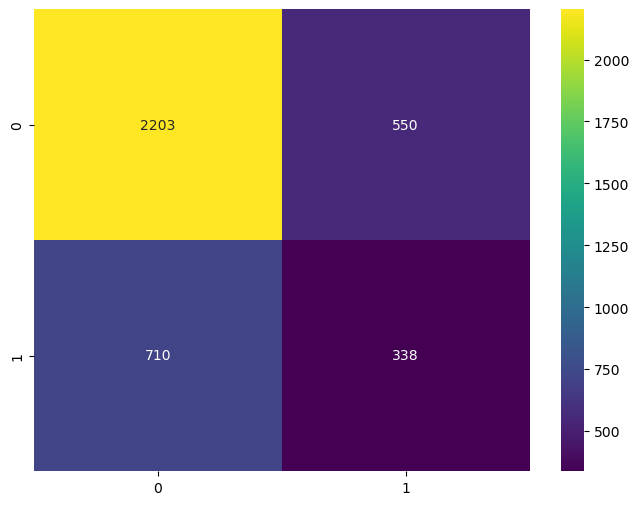

In [796]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(df_aux_2['EVENTO'], df_aux_2['y_pred_DNN_5'])
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

## Resultados:

#### Se observa que los modelos secuenciales superan en ROC_AUC al modelo clásico con validación cruzada, sin embargo tienen menor Accuracy.

+ Métricas modelo logístico clásico con validación cruzada
|Métrica|Valor|
|-------|-----|
|Acc| 72.74|
 |Err| 27.26|
 |Re| 11.26|
 |Sp| 96.15|
 |Pre| 52.68|
 |FPR| 3.85|
 |F1| 18.55|
 |ROC_AUC| 53.7|
 |Log_Loss| 9.82|
 
  + Métricas modelo secuencial con cuatro capas con 20 neuronas y 50 epoca.

|Métrica|Valor|
|-------|-----|
 |Acc| 71.72|
 |Err| 28.28|
 |Re| 18.8|
 |Sp| 91.86|
 |Pre| 46.79|
 |FPR| 8.14|
 |F1| 26.82|
 |ROC_AUC| 55.33|
 |Log_Loss| 10.19|
 
  + Métricas modelo secuencial con mismas capas 50 neuronas y 100 epocas. 

|Métrica|Valor|
|-------|-----|
 |Acc| 66.85|
 |Err| 33.15|
 |Re| 32.25|
 |Sp| 80.02|
 |Pre| 38.06|
 |FPR| 19.98|
 |F1| 34.92|
 |ROC_AUC| 56.14|
 |Log_Loss| 11.95|

<img src="images/backtest_modelo_clasico.PNG" style="width:900px;height:200px;">

In [802]:
deciles_train_06 = np.array([0.        , 0.11498571, 0.14727611, 0.18157093, 0.21908788,
                    0.25891251, 0.30698539, 0.35528827, 0.40967676, 0.47160332,
                    1.        ])

In [804]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_aux_2[(df_aux_2['PROBABILIDAD_DNN_4'] >= deciles[i]) & (df_aux_2['PROBABILIDAD_DNN_4'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs =df_aux_2['EVENTO'].sum()
total_no_EVENTOs = len(df_aux_2) - df_aux_2['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [805]:
df_resultado

,Min,Max,0,1,total
0,0.471603,1.000000,289,239,528
1,0.409677,0.471603,204,144,348
2,0.355288,0.409677,247,128,375
3,0.306985,0.355288,165,67,232
4,0.258913,0.306985,179,55,234
5,0.219088,0.258913,154,50,204
6,0.181571,0.219088,161,51,212
7,0.147276,0.181571,142,39,181
8,0.114986,0.147276,130,57,187
9,0.000000,0.114986,1082,218,1300


<img src="images/backtest_modelo_DNN_4.PNG" style="width:900px;height:200px;">

In [806]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_aux_2[(df_aux_2['PROBABILIDAD_DNN_5'] >= deciles[i]) & (df_aux_2['PROBABILIDAD_DNN_5'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs =df_aux_2['EVENTO'].sum()
total_no_EVENTOs = len(df_aux_2) - df_aux_2['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [807]:
df_resultado

,Min,Max,0,1,total
0,0.471603,1.000000,593,368,961
1,0.409677,0.471603,72,59,131
2,0.355288,0.409677,72,39,111
3,0.306985,0.355288,65,30,95
4,0.258913,0.306985,73,28,101
5,0.219088,0.258913,50,17,67
6,0.181571,0.219088,57,19,76
7,0.147276,0.181571,52,23,75
8,0.114986,0.147276,48,15,63
9,0.000000,0.114986,1665,450,2115


<img src="images/backtest_modelo_DNN_5.PNG" style="width:900px;height:200px;">

## Conclusiones:
El modelo logistico clásico con validación cruzada obtiene mejores métricas de desempeño que los modelos básicos en redes neuronales, como los son el modelo logístico y redes neuronales con pocas capas (2 y 4 probadas en este trabajo).

Frente a los modelos secuenciales con capas densas estos modelo reportan un mejor ROC_AUC que el modelo clásico, es decir tienen mejor predictividad que el modelo logistico clásico, sin embargo el Accuracy es menor.

Tomando el apetito de riesgo como el tercer decil, tenemos que el modelo nos acumula 1096 registros y una tasa de malos (evento: 30-12) de 13.1% con el modelo logístico clásico.